# Use case: Bicycle sharing
Let's go for a ride! Bike sharing systems are an increasingly popular system. They present a cost-effective, technology driven alternative to traveling with cars, easing traffic congestion and decreasing our carbon footprint!

Important <b> stakeholders of the city Vienna are interested in a forecasting tool </b>, which gives the potential bike shares for specific weather conditions at a certain time of the year. As for example, you know it's a lovely day in July, the weather is a bit cloudy, but it's still warm and a holiday. What will be the number of city bikes on the streets at 11:00? 

## Outline

Today you work with historical data. We assume this data represents the historical bike shares of the city vienna and were recorded in the years 2015, 2016 and 2017.
The first task is to <b> prepare the data </b>. 

1. load necessary libraries
2. load raw data
3. inspect the attributes
4. check missing values
5. adjust the timedate format
6. detect and remove outliers
7. save processed data


After this, you willl build the desired <b> forecasting tool using a machine learning model </b>!

<img src="../Figures/bike.png" alt="Paris" width="600" style="float:left"> 

<p style="font-size:1vw; color:#808080">Data source: Powered by TfL Open Data, 
Contains OS data © Crown copyright and database rights 2016 and Geomni UK Map data ©<br> and database rights [2019]<br>
https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset/metadata</p>

## Quick note about Jupyter cells

When you are editing a cell in Jupyter notebook, you need to re-run the cell by pressing `<Shift> + <Enter>`. This will allow changes you made to be available to other cells.

Use `<Enter>` to make new lines inside a cell you are editing.

### Code cells
Re-running will execute any statements you have written. To edit an existing code cell, click on it.

### Markdown cells
Re-running will render the markdown text. To edit an existing markdown cell, double-click on it.


### Common Jupyter operations

**Inserting and removing cells**

Use the "plus sign" icon to insert a cell below the currently selected cell
Use "Insert" -> "Insert Cell Above" from the menu to insert above

**Clear the output of all cells**

Use "Kernel" -> "Restart" from the menu to restart the kernel
click on "clear all outputs & restart" to have all the output cleared

**Show function signature**

Start typing function and hit `<Shift> + <Tab>`

# Part 1 preprocessing

## load necessary libraries

Import the following packages: `pandas as pd`, `numpy as np`, `from scipy import stats`, `matplotlib.pyplot as plt` and `seaborn as sns`

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## load data
As we have done the step of collecting some sample data for you already, you only have to load the data into a pandas dataframe using the method `pd.read_csv(...)`. Typing a variable name into a jupyter cell and running it, shows you the current content.

In [5]:
df = pd.read_csv('../inputdata_raw.csv')
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17031,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,19
17032,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,20
17033,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,21
17034,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,22


## inspect data

Use pandas function `df.head()` to observe the first 5 entry rows of the dataframe.

In [ ]:
df.head()

You are presented with the following attribtues

- `timestamp`:   timestamp of data point
- `cnt`: <b> the count of bike shares, this is our target value! </b>
- `t1`: real temperature in C
- `t2`: temperature in C "feels like"
- `hum`: humidity in %
- `windspeed`: wind speed in km/h
- `weathercode`: category field, where 1= clear ; 2 = scattered clouds / few clouds; 3 = broken clouds; 4 = cloudy; 7 = rain/ light rain shower; 10 = rain with thunderstorm; 26 = snowfall
- `isholiday`: boolean field
- `isweekend`: boolean field
- `season`: category field, where 0-spring ; 1-summer; 2-fall; 3-winter.

## missing values

Use pandas functions `df.isnull().sum()` to check if there are any missing values. 

In [ ]:
print("missing values:\n", df.isnull().sum())

Fortunately, there are none, let's proceed. 

## feature engineering

Use the function `type()` to identify the data type of the current `df['timestamp'][0]` attribute.

In [ ]:
type(df['timestamp'][0])

Since it is a `str`, convert it into a datetime object using the pandas function 

`pd.to_datetime(df['...'] , format = '%Y%m%d %H:%M:%S')`

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format = '%Y%m%d %H:%M:%S')
df['timestamp']

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

Add month and hour 

In [8]:
df['month'] = df['timestamp'].dt.month
df['hour'] = df['timestamp'].dt.hour

Let's see which month is the most popular for bike sharing. Use the function `groupby([month-column]).sum()[count-column]` to get an array of the number of bike shares in a month

Text(0, 0.5, 'sum of cnt')

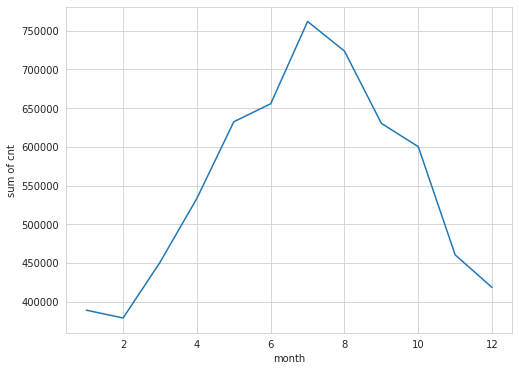

In [9]:
sums = df.groupby(['month']).sum()['cnt']

sums = sums/3
plt.figure(figsize = (8,6))
plt.plot(df['month'].unique(),sums)
plt.xlabel('month')
plt.ylabel('sum of cnt')

Compare the visulization with the image below. The sum all the bike shares in a months is highly correlated with the temperatures over a typical year. 

<img src="Figures/vienna-average-weather.png" alt="Paris" width="600" style="float:left">

## outliers

We are most interested in the attributes `df.columns` wich have numerical values:

`cnt`,`t1`,`t2`,`hum` and `windspeed`

Use the pandas `describe()` function on these columns to see their `mean`, `std`,`min`,`max` and the `IQR values`

In [18]:
df[df.columns[1:6]].describe()

,cnt,t1,t2,hum,wind_speed
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063
std,1085.108068,5.571818,6.615145,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


Use the seaborn function `sns.boxplot(column,dataframe)` to get a better picture of the outliers in each numerical attribute.

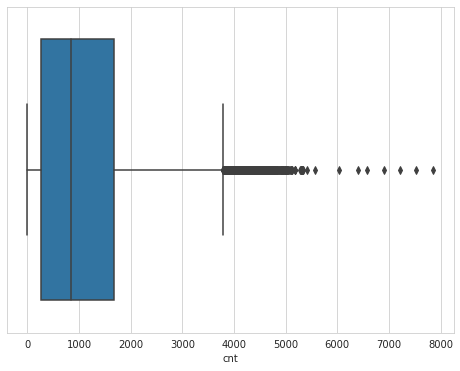

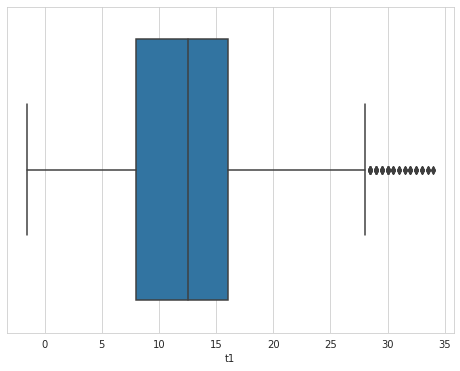

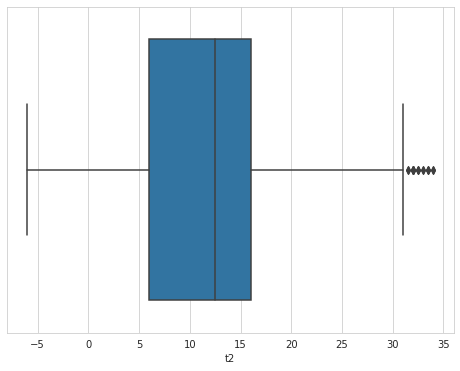

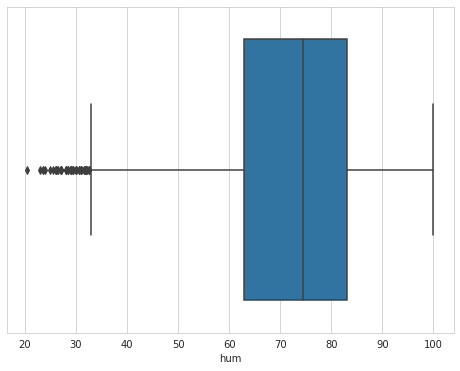

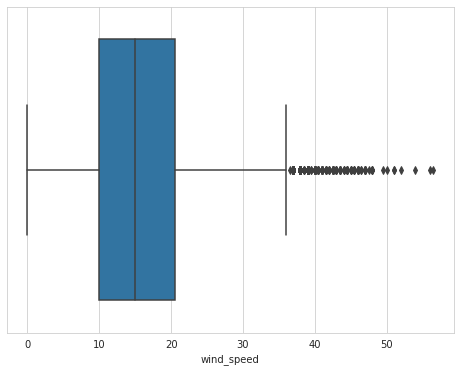

In [10]:
for column in df.columns[1:6]:
    plt.figure(figsize = (8,6))
    sns.boxplot(x=column, data = df)

Additional: 

Attributes `cnt` and `wind_speed` have many outliers. Your task is to <b>write a function</b>, which <b>removes these rows with the z-score</b>. So, essentially you put a filter on the data frame with `stats.zscore()`. Select all rows of a certain column where the values are within <b> 3 standard deviations from the mean</b>. 

1. the condition for a cell `x` to be selected is `np.abs(stats.zscore(df[x])) < 3`, try this with `x=cnt` for example.
2. then select the rows with `df[...]` where the above condition is `true` and  `return` them


More infos on z-score: https://en.wikipedia.org/wiki/Standard_score

In [20]:
def remove_outliers(df,column):
    return df[(np.abs(stats.zscore(df[column])) < 3)]
    
xdf = remove_outliers(df,'cnt')
xxdf = remove_outliers(xdf, 'wind_speed')

In [21]:
xxdf.shape

(17036, 10)

Finally, save the generated dataframe as `inputdata.csv` using `.to_csv(..., index = False)`.

In [27]:
xxdf.to_csv('inputdata.csv', index = False)